# Análise Financeira com Python

### Objetivo:

Vamos dividir essa mentoria em 2 etapas:

Etapa 1 - Usar o Python para puxar dados da Web de cotação de qualquer ação e analisar o resultado de uma carteira

Etapa 2 - Puxar indicadores de empresas diferentes e fazer a comparação entre elas para escolhar "qual a melhor empresa"

### Disclamer Importante

Não sou analista, influencer, agente autônomo, sábio ou nada de finanças ou ações. Temos 1 objetivo aqui e apenas 1: aprender como usar o Python para fazer o que a gente quiser.

Então não se preocupe com "erros teóricos" ou ainda com o resultado de qualquer tipo de análise. O nosso objetivo aqui é treinar Python

### Parte 1 - Carteira de Investimentos

- Vamos pegar uma carteira teórica completa e calcular o rendimento dela ao longo de 2022 e comparar com os principais indicadores (CDI, IBOV, IPCA). No caso vamos usar o IBOV, mas o procedimento para os outros indicadores é semelhante

- Carteira: R$6800,00 , divididos da seguinte maneira em 16/11/2022:
- 53,3% Ações Brasileiras - Arquivo Carteira
- 20,5% FII - Arquivo Carteira
- 26,2% Tesouro Selic

In [2]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

#importando a carteira
carteira = pd.read_excel('CarteiraMentoria.xlsx')
display(carteira)

,Ativos,Valor Investido,Tipo,Qtde
0,BBAS3,1173.02,Ação,30
1,BBSE3,299.20,Ação,10
2,BPAC11,383.18,Ação,15
3,KLBN3,207.44,Ação,50
4,PRIO3,934.40,Ação,30
5,USIM5,452.50,Ação,50
6,MRFG3,134.60,Ação,1
7,PETZ3,261.63,Ação,30
8,BTLG11,100.59,FII,1
9,HSLG11,277.38,FII,3


C:\Users\User\AppData\Local\Temp\ipykernel_10328\741077092.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grafico2 = carteira.groupby('Tipo').sum().plot.pie(ax=ax2, y='Valor Investido', legend=False, title='Distribuição de Classe de Ativos da Carteira', figsize=(15, 5), autopct="%.1f%%")


Text(0, 0.5, '')

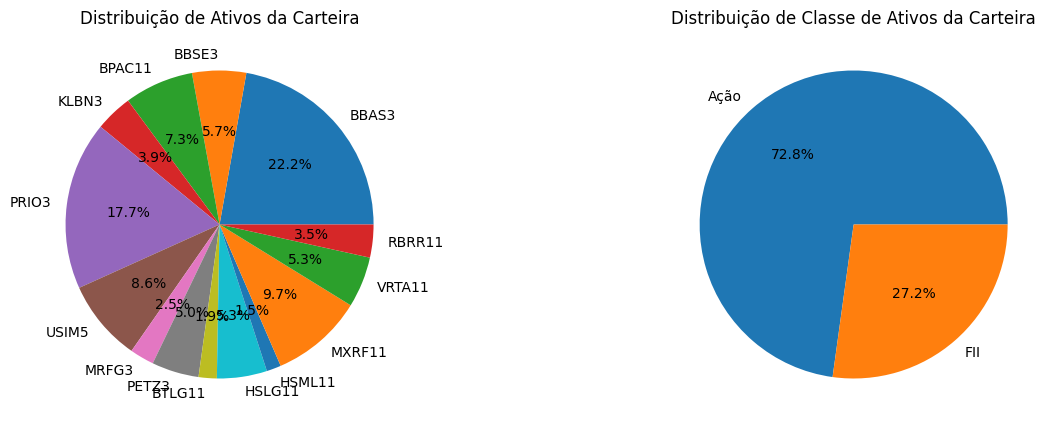

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
#vamos ver a distribuição da carteira por ativos
grafico1 = carteira.plot.pie(ax=ax1, labels=carteira['Ativos'], y='Valor Investido', legend=False, title='Distribuição de Ativos da Carteira', figsize=(15, 5), autopct="%.1f%%")
grafico1.set_ylabel('')
#vamos ver agora a distribuição da carteira por classe de ativo
#print(carteira.groupby('Tipo').sum())
grafico2 = carteira.groupby('Tipo').sum().plot.pie(ax=ax2, y='Valor Investido', legend=False, title='Distribuição de Classe de Ativos da Carteira', figsize=(15, 5), autopct="%.1f%%")
grafico2.set_ylabel('')

#### Pegando as Cotações ao Longo de 2020

- IBOV

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,106125.000000,103413.00000,104823.00,103922.000000,11128500,103922.000000
2022-01-04,104276.000000,103096.00000,103922.00,103514.000000,11491600,103514.000000
2022-01-05,103514.000000,100850.00000,103514.00,101006.000000,0,101006.000000
2022-01-06,102235.000000,101000.00000,101006.00,101561.000000,11749200,101561.000000
2022-01-07,102719.000000,101104.00000,101561.00,102719.000000,11733200,102719.000000
...,...,...,...,...,...,...
2022-11-09,116183.000000,113110.00000,116153.00,113580.000000,20531600,113580.000000
2022-11-10,113579.000000,108516.00000,113579.00,109775.000000,26029300,109775.000000
2022-11-11,113010.000000,109408.00000,109775.00,111820.000000,25038700,111820.000000


<AxesSubplot: xlabel='Date'>

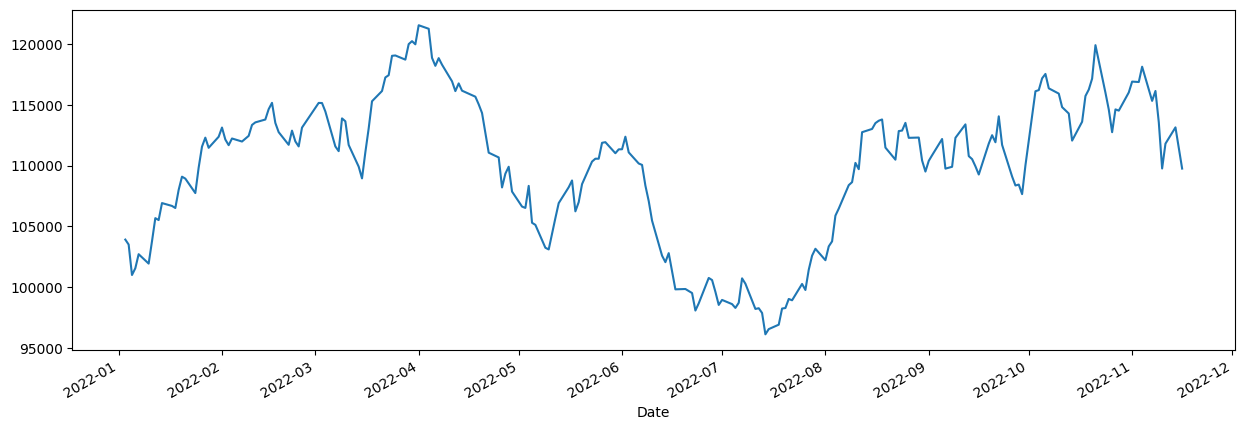

In [4]:
import pandas_datareader.data as web

#indices: ^BVSP
#ações brasileiras: TICKER.SA, PETR4.SA
#data_source = yahoo
#datas: '2020-12-10'
ibov_df = web.DataReader('^BVSP', data_source='yahoo', start='2022-01-01', end='2022-11-16')
display(ibov_df)
#print(ibov_df.info())
ibov_df['Adj Close'].plot(figsize=(15, 5))

- Da nossa carteira

In [5]:
carteira_df = pd.DataFrame()

for ativo in carteira['Ativos']:
    if 'Tesouro' not in ativo:
        carteira_df[ativo] = web.DataReader('{}.SA'.format(ativo), data_source='yahoo', start='2022-01-01', end='2022-11-1')['Adj Close']
carteira_df = carteira_df.ffill()
print(carteira_df.info())
display(carteira_df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 219 entries, 2022-01-03 to 2022-11-16
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BBAS3   219 non-null    float64
 1   BBSE3   219 non-null    float64
 2   BPAC11  219 non-null    float64
 3   KLBN3   219 non-null    float64
 4   PRIO3   219 non-null    float64
 5   USIM5   219 non-null    float64
 6   MRFG3   219 non-null    float64
 7   PETZ3   219 non-null    float64
 8   BTLG11  219 non-null    float64
 9   HSLG11  1 non-null      float64
 10  HSML11  219 non-null    float64
 11  MXRF11  219 non-null    float64
 12  VRTA11  219 non-null    float64
 13  RBRR11  219 non-null    float64
dtypes: float64(14)
memory usage: 25.7 KB
None


,BBAS3,BBSE3,BPAC11,KLBN3,PRIO3,USIM5,MRFG3,PETZ3,BTLG11,HSLG11,HSML11,MXRF11,VRTA11,RBRR11
Date,,,,,,,,,,,,,,
2022-01-03,27.330170,19.134233,19.707718,5.301922,20.290001,14.203058,19.106434,15.800805,99.980255,NaN,75.648613,9.211004,96.950691,91.860664
2022-01-04,27.358622,19.087790,19.257143,5.561457,20.719999,14.089207,19.322021,14.392515,99.942505,NaN,76.316315,9.220279,95.584137,91.842117
2022-01-05,26.903435,18.855577,18.424559,5.524380,18.490000,13.273265,19.169315,13.753292,97.527893,NaN,74.576508,9.201727,95.011681,91.396721
2022-01-06,27.121544,18.985619,18.224457,5.570725,18.959999,13.292241,19.169315,14.012976,98.207001,NaN,75.695625,9.201727,96.904526,92.055519
2022-01-07,27.149992,18.391153,18.362673,5.478035,19.820000,13.927916,19.016607,14.162795,98.923836,NaN,74.698769,9.266660,97.643196,91.897781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,37.060001,31.250000,28.150000,4.490000,37.220001,7.600000,11.430000,8.880000,101.252449,NaN,89.089996,10.200000,94.300003,89.086662
2022-11-10,36.330002,29.950001,26.129999,4.520000,36.580002,7.280000,10.830000,8.470000,100.468239,NaN,88.199997,10.190000,93.709999,87.420006
2022-11-11,35.520000,30.379999,25.670000,4.800000,37.700001,8.050000,11.760000,8.140000,100.259781,NaN,86.699997,10.160000,93.580002,90.279999


- Do Tesouro Selic:

In [6]:
link = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
tesouro_df = pd.read_csv(link, sep=';', decimal=',')
tesouro_df['Data Base'] = pd.to_datetime(tesouro_df['Data Base'], format='%d/%m/%Y')

tesouro_df = tesouro_df.loc[tesouro_df['Tipo Titulo']=='Tesouro Selic', :]
display(tesouro_df)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro Selic,01/03/2025,2022-06-28,0.10,0.11,11800.78,11791.75,11791.75
8,Tesouro Selic,01/03/2027,2022-06-28,0.15,0.17,11748.75,11737.42,11737.42
15,Tesouro Selic,01/03/2023,2022-07-29,0.02,0.03,11966.53,11959.92,11959.92
26,Tesouro Selic,01/03/2027,2022-07-29,0.17,0.18,11877.00,11865.64,11865.64
31,Tesouro Selic,01/09/2024,2022-07-29,0.07,0.09,11949.31,11940.89,11940.89
...,...,...,...,...,...,...,...,...
125909,Tesouro Selic,01/03/2027,2021-04-30,0.35,0.36,10619.38,10613.24,10611.94
125930,Tesouro Selic,01/03/2023,2021-07-14,0.13,0.14,10892.72,10890.95,10889.09
125931,Tesouro Selic,01/09/2024,2021-07-14,0.23,0.24,10839.14,10835.77,10833.88
125939,Tesouro Selic,01/03/2025,2021-07-14,0.24,0.25,10820.52,10816.61,10814.72


- Juntar o tesouro selic na nossa carteira

In [7]:
tesouro_df = tesouro_df.rename(columns={'Data Base': 'Date'})
carteira_df = carteira_df.merge(tesouro_df[['Date', 'PU Base Manha']], on='Date', how='left')
display(carteira_df)

,Date,BBAS3,BBSE3,BPAC11,KLBN3,PRIO3,USIM5,MRFG3,PETZ3,BTLG11,HSLG11,HSML11,MXRF11,VRTA11,RBRR11,PU Base Manha
0,2022-01-03,27.330170,19.134233,19.707718,5.301922,20.290001,14.203058,19.106434,15.800805,99.980255,NaN,75.648613,9.211004,96.950691,91.860664,11228.88
1,2022-01-03,27.330170,19.134233,19.707718,5.301922,20.290001,14.203058,19.106434,15.800805,99.980255,NaN,75.648613,9.211004,96.950691,91.860664,11201.71
2,2022-01-03,27.330170,19.134233,19.707718,5.301922,20.290001,14.203058,19.106434,15.800805,99.980255,NaN,75.648613,9.211004,96.950691,91.860664,11183.97
3,2022-01-03,27.330170,19.134233,19.707718,5.301922,20.290001,14.203058,19.106434,15.800805,99.980255,NaN,75.648613,9.211004,96.950691,91.860664,11088.54
4,2022-01-04,27.358622,19.087790,19.257143,5.561457,20.719999,14.089207,19.322021,14.392515,99.942505,NaN,76.316315,9.220279,95.584137,91.842117,11232.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,2022-11-14,36.400002,30.990000,26.250000,4.690000,38.500000,7.830000,10.890000,8.190000,100.229996,NaN,86.449997,10.170000,93.660004,88.209999,12411.65
869,2022-11-14,36.400002,30.990000,26.250000,4.690000,38.500000,7.830000,10.890000,8.190000,100.229996,NaN,86.449997,10.170000,93.660004,88.209999,12406.80
870,2022-11-14,36.400002,30.990000,26.250000,4.690000,38.500000,7.830000,10.890000,8.190000,100.229996,NaN,86.449997,10.170000,93.660004,88.209999,12399.23
871,2022-11-14,36.400002,30.990000,26.250000,4.690000,38.500000,7.830000,10.890000,8.190000,100.229996,NaN,86.449997,10.170000,93.660004,88.209999,12331.22


In [8]:
carteira_df = carteira_df.rename(columns={'PU Base Manha': 'Tesouro Selic'})
carteira_df = carteira_df.ffill()
display(carteira_df)

,Date,BBAS3,BBSE3,BPAC11,KLBN3,PRIO3,USIM5,MRFG3,PETZ3,BTLG11,HSLG11,HSML11,MXRF11,VRTA11,RBRR11,Tesouro Selic
0,2022-01-03,27.330170,19.134233,19.707718,5.301922,20.290001,14.203058,19.106434,15.800805,99.980255,NaN,75.648613,9.211004,96.950691,91.860664,11228.88
1,2022-01-03,27.330170,19.134233,19.707718,5.301922,20.290001,14.203058,19.106434,15.800805,99.980255,NaN,75.648613,9.211004,96.950691,91.860664,11201.71
2,2022-01-03,27.330170,19.134233,19.707718,5.301922,20.290001,14.203058,19.106434,15.800805,99.980255,NaN,75.648613,9.211004,96.950691,91.860664,11183.97
3,2022-01-03,27.330170,19.134233,19.707718,5.301922,20.290001,14.203058,19.106434,15.800805,99.980255,NaN,75.648613,9.211004,96.950691,91.860664,11088.54
4,2022-01-04,27.358622,19.087790,19.257143,5.561457,20.719999,14.089207,19.322021,14.392515,99.942505,NaN,76.316315,9.220279,95.584137,91.842117,11232.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,2022-11-14,36.400002,30.990000,26.250000,4.690000,38.500000,7.830000,10.890000,8.190000,100.229996,NaN,86.449997,10.170000,93.660004,88.209999,12411.65
869,2022-11-14,36.400002,30.990000,26.250000,4.690000,38.500000,7.830000,10.890000,8.190000,100.229996,NaN,86.449997,10.170000,93.660004,88.209999,12406.80
870,2022-11-14,36.400002,30.990000,26.250000,4.690000,38.500000,7.830000,10.890000,8.190000,100.229996,NaN,86.449997,10.170000,93.660004,88.209999,12399.23
871,2022-11-14,36.400002,30.990000,26.250000,4.690000,38.500000,7.830000,10.890000,8.190000,100.229996,NaN,86.449997,10.170000,93.660004,88.209999,12331.22


- Calcular o valor investido

In [9]:
valor_investido = carteira_df.copy()

for ativo in carteira['Ativos']:
    #print(carteira.loc[carteira['Ativos']==ativo, 'Qtde'].values[0])
    valor_investido[ativo] = valor_investido[ativo] * carteira.loc[carteira['Ativos']==ativo, 'Qtde'].values[0]

valor_investido = valor_investido.set_index('Date')
valor_investido['Total'] = valor_investido.sum(axis=1)
display(valor_investido)

,BBAS3,BBSE3,BPAC11,KLBN3,PRIO3,USIM5,MRFG3,PETZ3,BTLG11,HSLG11,HSML11,MXRF11,VRTA11,RBRR11,Tesouro Selic,Total
Date,,,,,,,,,,,,,,,,
2022-01-03,819.905090,191.342335,295.615768,265.096092,608.700027,710.152912,19.106434,474.024153,99.980255,NaN,75.648613,460.550213,290.852074,183.721329,11228.88,15723.575295
2022-01-03,819.905090,191.342335,295.615768,265.096092,608.700027,710.152912,19.106434,474.024153,99.980255,NaN,75.648613,460.550213,290.852074,183.721329,11201.71,15696.405295
2022-01-03,819.905090,191.342335,295.615768,265.096092,608.700027,710.152912,19.106434,474.024153,99.980255,NaN,75.648613,460.550213,290.852074,183.721329,11183.97,15678.665295
2022-01-03,819.905090,191.342335,295.615768,265.096092,608.700027,710.152912,19.106434,474.024153,99.980255,NaN,75.648613,460.550213,290.852074,183.721329,11088.54,15583.235295
2022-01-04,820.758648,190.877895,288.857145,278.072834,621.599979,704.460335,19.322021,431.775455,99.942505,NaN,76.316315,461.013937,286.752411,183.684235,11232.65,15696.083716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-14,1092.000046,309.899998,393.750000,234.500003,1155.000000,391.499996,10.890000,245.699987,100.229996,NaN,86.449997,508.500004,280.980011,176.419998,12411.65,17397.470036
2022-11-14,1092.000046,309.899998,393.750000,234.500003,1155.000000,391.499996,10.890000,245.699987,100.229996,NaN,86.449997,508.500004,280.980011,176.419998,12406.80,17392.620036
2022-11-14,1092.000046,309.899998,393.750000,234.500003,1155.000000,391.499996,10.890000,245.699987,100.229996,NaN,86.449997,508.500004,280.980011,176.419998,12399.23,17385.050036


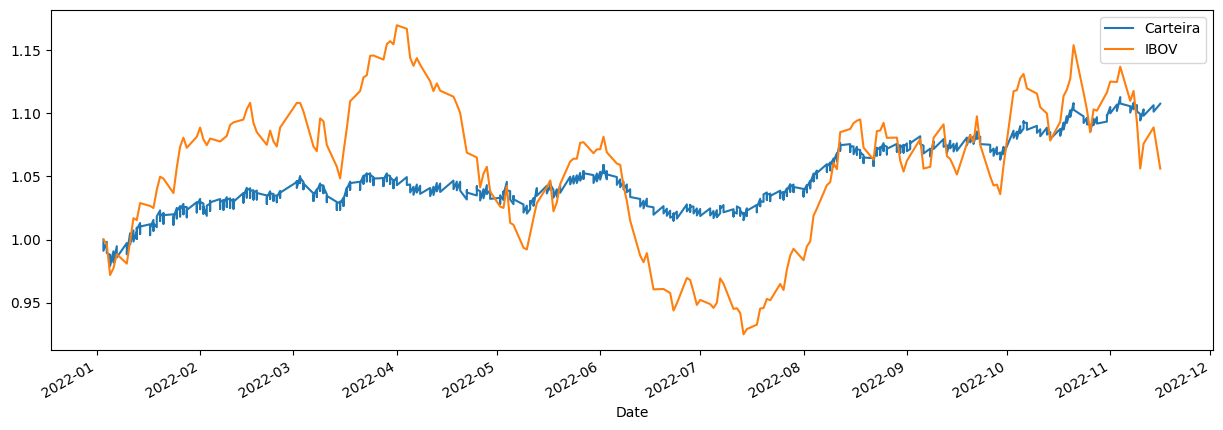

In [10]:
valor_investido_norm = valor_investido / valor_investido.iloc[0]
ibov_df_norm = ibov_df / ibov_df.iloc[0]

valor_investido_norm['Total'].plot(figsize=(15, 5), label='Carteira')
ibov_df_norm['Adj Close'].plot(label='IBOV')
plt.legend()

In [11]:
rentabilidade_carteira = valor_investido_norm['Total'].iloc[-1] - 1
rentabilidade_ibov = ibov_df_norm['Adj Close'].iloc[-1] - 1 
print('Rentabilidade da Carteira {:.1%}'.format(rentabilidade_carteira))
print('Rentabilidade do Ibovespa {:.1%}'.format(rentabilidade_ibov))

Rentabilidade da Carteira 10.8%
Rentabilidade do Ibovespa 5.6%


### Parte 2 - Comparativo entre Ativos

Créditos: https://simply-python.com/2019/01/16/retrieving-stock-statistics-from-yahoo-finance-using-python/

In [23]:
tgt_website = r'https://finance.yahoo.com/quote/PETR4.SA/key-statistics?p=PETR4.SA'
 
def get_key_stats(tgt_website, ticker):
    df_list = pd.read_html(tgt_website)
    result_df = df_list[0]
    for df in df_list[1:]:
        result_df = result_df.append(df)
    result_df = result_df.rename(columns={1: ticker})
    return result_df.set_index(0).T
    
df_petr4 = get_key_stats(tgt_website)
display(df_petr4)

TypeError: get_key_stats() missing 1 required positional argument: 'ticker'

- Comparando as ações de:
    1. Magazine Luiza (MGLU3)
    2. Lojas Americanas (LAME4)
    3. Via Varejo (VVAR3)

In [16]:
acoes = ['MGLU3', 'LAME4', 'VVAR3']

estatiscas_empresas = pd.DataFrame()

for acao in acoes:
    link = f'https://finance.yahoo.com/quote/{acao}.SA/key-statistics?p={acao}.SA'
    df = get_key_stats(link, acao)
    estatiscas_empresas = estatiscas_empresas.append(df)
    
display(estatiscas_empresas)

HTTPError: HTTP Error 404: Not Found

In [18]:
print(list(estatiscas_empresas.columns))

[]


#### Price/sales (ttm)

In [19]:
import seaborn as sns

sns.barplot(x=estatiscas_empresas.index, y=estatiscas_empresas['Price/sales (ttm)'])

KeyError: 'Price/sales (ttm)'

#### Enterprise value / EBITDA

In [20]:
sns.barplot(x=estatiscas_empresas.index, y=estatiscas_empresas['Enterprise value/EBITDA 6'])

KeyError: 'Enterprise value/EBITDA 6'